In [1]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE=16
# set default size
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

In [2]:
import csv

import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from datetime import datetime as dt
import numpy as np
import re
%matplotlib inline

In [3]:
# Read CSV file
data = []
with open('flight_data.csv','r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter = ',')
    for row in csvreader:
        data.append(row)
#data[1]

In [4]:
# Transforms into data frame
df = pd.DataFrame(data[1:], columns = data[0])
#df.head()

In [5]:
# absolute time, clock time and DateNum (date as datetime)
absTime = []
clockTime = []
dateNum = []
for index, row in df.iterrows():
    temp = row.Date + ' ' + row.Time
    absTime.append( dt.strptime(temp, '%d/%m/%y %H:%M:%S'))
    clockTime.append( dt.strptime(row.Time, '%H:%M:%S'))
    dateNum.append( dt.strptime(row['Date'],'%d/%m/%y'))
df['AbsTime'] = absTime
df['ClockTime'] = clockTime
df['DateNum'] = dateNum

#df.head()

In [6]:
# week range definition
start = dt(2019,8,19)
end = dt(2019,9,20,17,0,0)
week_range=pd.date_range(start, end, freq = 'W-MON')
endday = pd.date_range(end, end, freq = 'W-FRI')
week_range=pd.DatetimeIndex.append(week_range,endday)
#week_range

In [7]:
#all days
everyday = pd.date_range(start,end, freq='d')

In [8]:
# week number definition
week_labels = ['Wk1','Wk2','Wk3','Wk4','Wk5']
df['WeekNumber'] = pd.cut(df['AbsTime'], week_range, labels=week_labels)

In [9]:
# time range definition
start = dt(1900,1,1)
end = dt(1900,1,2)
time_range=pd.date_range(start, end, freq = '3h')
#time_range

In [10]:
# Time Band
df['TimeBand']= pd.cut(df['ClockTime'], time_range,\
                  labels=['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24'])

In [11]:
# week day
weekDay = []
for k in range(0, len(df)):
    weekDay.append( dt.strftime(df['AbsTime'][k], '%a'))
df['WeekDay'] = weekDay
#df.head()

In [12]:
# make week day categorical
day_labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df['WeekDay'] = pd.Categorical(df.WeekDay,categories = day_labels ,\
                       ordered = True)

In [13]:
df['IsSale'] = (df['Comments']=='Risparmia')
df['IsSoldOut'] = (df['Comments']=='Sold out')

In [14]:
# convert price from string to float
df['Price'] = df['Price'].apply(lambda x: float(x))
#df.head()

In [15]:
# extract remaining tickets
p = re.compile(r'\d')
rem = []
for k in range(0,len(df)):
    res=p.findall( df['Comments'][k])
    if len(res)==0:
        rem.append(np.NaN)
    else:
        rem.append(int(res[0]))
df['Remaining'] = rem

In [16]:
# Convert Alitalia prices into £
df.loc[df['Company']=='Alitalia','Price'] =\
    df.loc[df['Company']=='Alitalia','Price']/1.1

In [17]:
# start seaborn
#sns.set()

In [18]:
# function to change ylim to include 0
def yorigshow():
    rg = plt.ylim();
    new_rg = (0, rg[1])
    plt.ylim(new_rg);

## Sanity checks

In [19]:
df.describe()

,Price,Remaining
count,751.000000,205.000000
mean,129.452141,2.180488
std,67.866483,1.039235
min,46.920000,1.000000
25%,85.750000,2.000000
50%,105.950000,2.000000
75%,138.270000,2.000000
max,353.372727,5.000000


In [20]:
df.head()

,Date,Time,Company,DepartureTime,ArrivalTime,Price,Currency,Comments,AbsTime,ClockTime,DateNum,WeekNumber,TimeBand,WeekDay,IsSale,IsSoldOut,Remaining
0,19/08/19,13:22:03,Ryanair,19:25,22:55,73.990000,£,,2019-08-19 13:22:03,1900-01-01 13:22:03,2019-08-19,Wk1,12-15,Mon,False,False,NaN
1,20/08/19,10:21:38,Ryanair,19:25,22:55,73.990000,£,1 posti rimasti a questo prezzo,2019-08-20 10:21:38,1900-01-01 10:21:38,2019-08-20,Wk1,9-12,Tue,False,False,1.0
2,20/08/19,10:22:39,Alitalia,20:00,23:30,78.736364,Eur,,2019-08-20 10:22:39,1900-01-01 10:22:39,2019-08-20,Wk1,9-12,Tue,False,False,NaN
3,20/08/19,15:02:46,Ryanair,19:25,22:55,91.990000,£,3 posti rimasti a questo prezzo,2019-08-20 15:02:46,1900-01-01 15:02:46,2019-08-20,Wk1,15-18,Tue,False,False,3.0
4,20/08/19,15:03:54,Alitalia,20:00,23:30,78.736364,Eur,,2019-08-20 15:03:54,1900-01-01 15:03:54,2019-08-20,Wk1,15-18,Tue,False,False,NaN


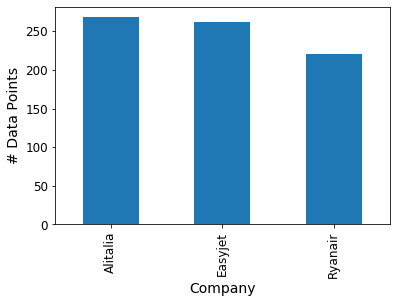

In [21]:
# data points per company
df.groupby('Company')['Price'].count().plot(kind='bar');
yorigshow()
plt.ylabel('# Data Points');

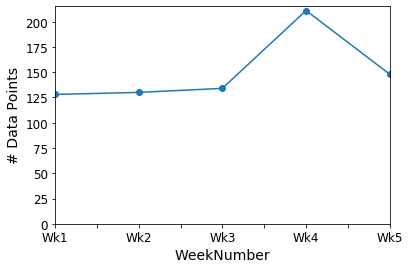

In [22]:
# data points per week
df.groupby('WeekNumber')['Price'].count().plot(marker='o');
yorigshow()
plt.ylabel('# Data Points');

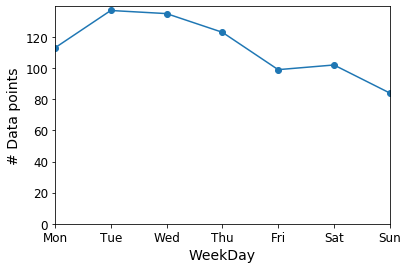

In [23]:
#data points per week day
df.groupby('WeekDay')['WeekDay'].count().plot(marker='o');
yorigshow()
plt.ylabel('# Data points');

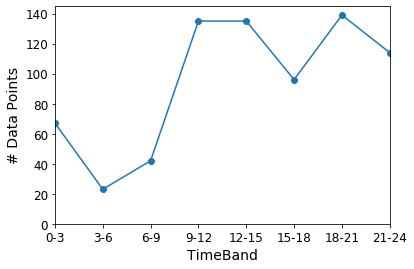

In [24]:
# data points per time band
df.groupby('TimeBand')['Price'].count().plot(marker = 'o');
yorigshow()
plt.ylabel('# Data Points');

In [25]:
# format your data to desired format.

import matplotlib.dates as mdates


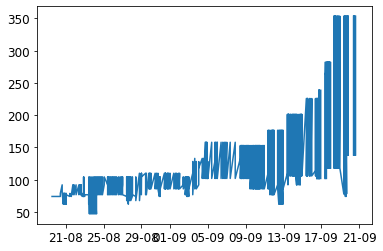

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.AbsTime, df.Price)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# rotate and align the tick labels so they look better
#fig.autofmt_xdate()

In [27]:
# Departure time check
res = df.groupby('Company')['DepartureTime'].apply(lambda x: len(np.unique(x)))
np.equal(res.values, np.array([1,1,1]))


array([ True,  True,  True])

In [28]:
# Arrival Time check
df.groupby('Company')['ArrivalTime'].apply(lambda x: len(np.unique(x)))

Company
Alitalia    1
Easyjet     1
Ryanair     1
Name: ArrivalTime, dtype: int64

## Time series

In [29]:
today = dt.now()

In [150]:
def time_history_plot(df):
    fig, ax = plt.subplots(figsize=(8,6))
    for label, subdf in df.groupby('Company'):
        subdf.plot(x='AbsTime', y='Price', label=label,ax=ax, linewidth=2)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    today = dt.now()
    plt.xticks(week_range, week_labels+['Flight']);

    plt.xlim(week_range[0],dt(2019,9,23));
    plt.ylabel('Price (£)')
    plt.xlabel('Time')
    yorigshow()
    plt.grid('on');


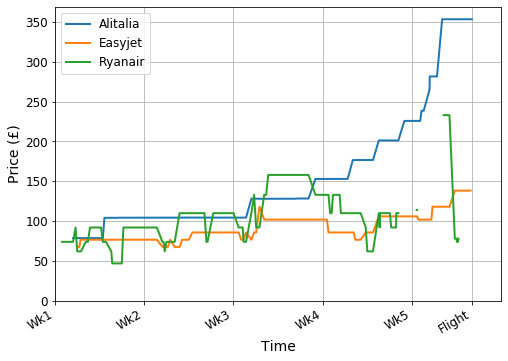

In [151]:
time_history_plot(df)

In [32]:
# Extract individual companies
df_ryan = df.loc[ df['Company'] == 'Ryanair' ]
df_easy = df.loc[ df['Company'] == 'Easyjet' ]
df_ali = df.loc[ df['Company'] == 'Alitalia']

#df_ryan.head()

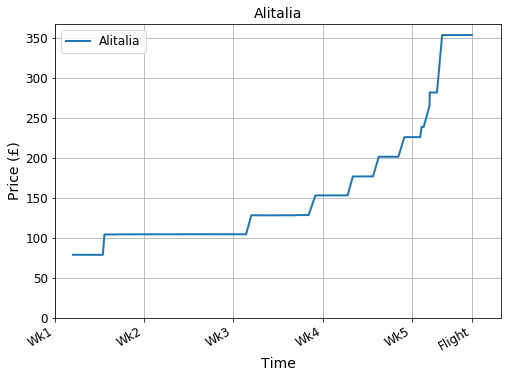

In [33]:
time_history_plot(df_ali)
plt.title('Alitalia');

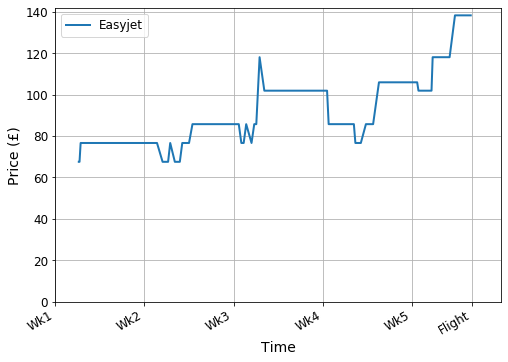

In [34]:
time_history_plot(df_easy)

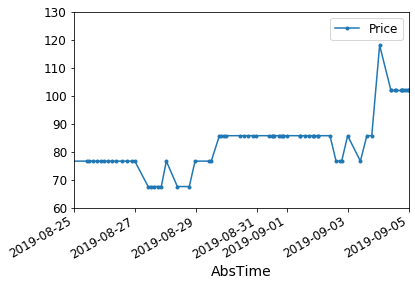

In [35]:
df_easy.plot(x='AbsTime',y='Price',marker='.')
plt.xlim(dt(2019,8,25),dt(2019,9,5))
plt.ylim(60,130);

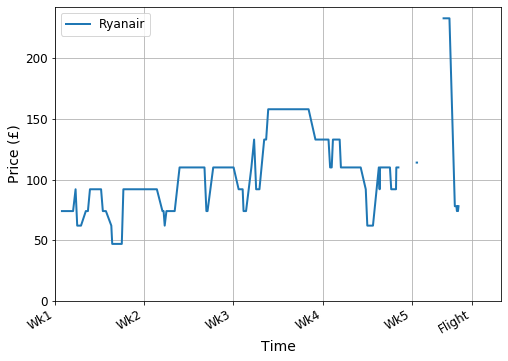

In [36]:
time_history_plot(df_ryan)

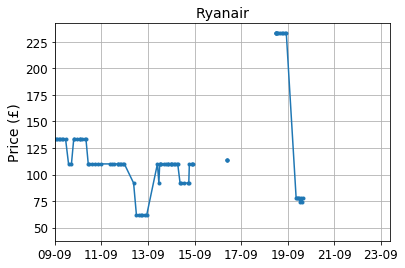

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(list(df_ryan.AbsTime), list(df_ryan.Price),marker='.')
#plt.xticks(week_range);

plt.xlim(week_range[3],today);
plt.ylabel('Price (£)')
#yorigshow()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'));
plt.title('Ryanair');
plt.grid('on');


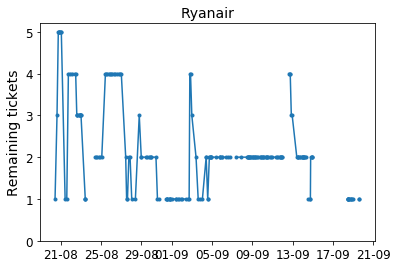

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df_ryan.AbsTime, df_ryan.Remaining,marker='.')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.title('Ryanair');
plt.yticks(range(0,6));
plt.ylabel('Remaining tickets');

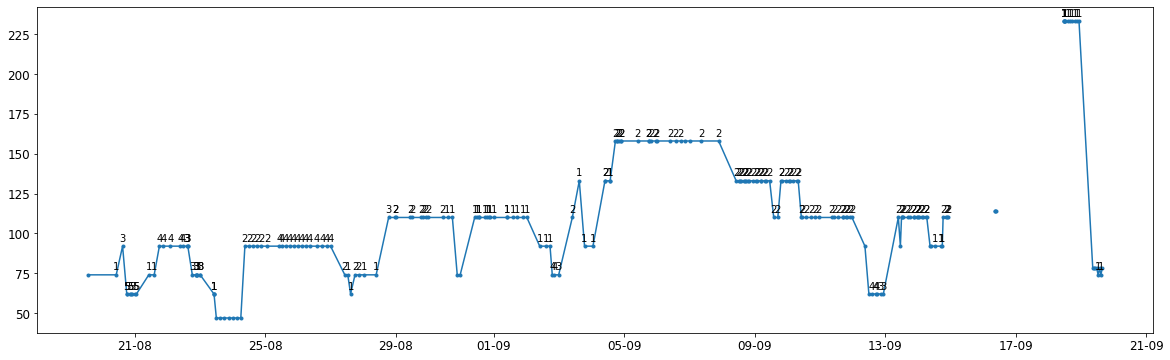

In [39]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(df_ryan.AbsTime, df_ryan.Price,marker='.')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
for k in range(len(df_ryan)):
    if not(np.isnan(df_ryan.iloc[k]['Remaining'])):
        plt.annotate('{:.1g}'.format(df_ryan.iloc[k]['Remaining']),
                            xy=(df_ryan.iloc[k]['AbsTime'], df_ryan.iloc[k]['Price']),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center',va='bottom')

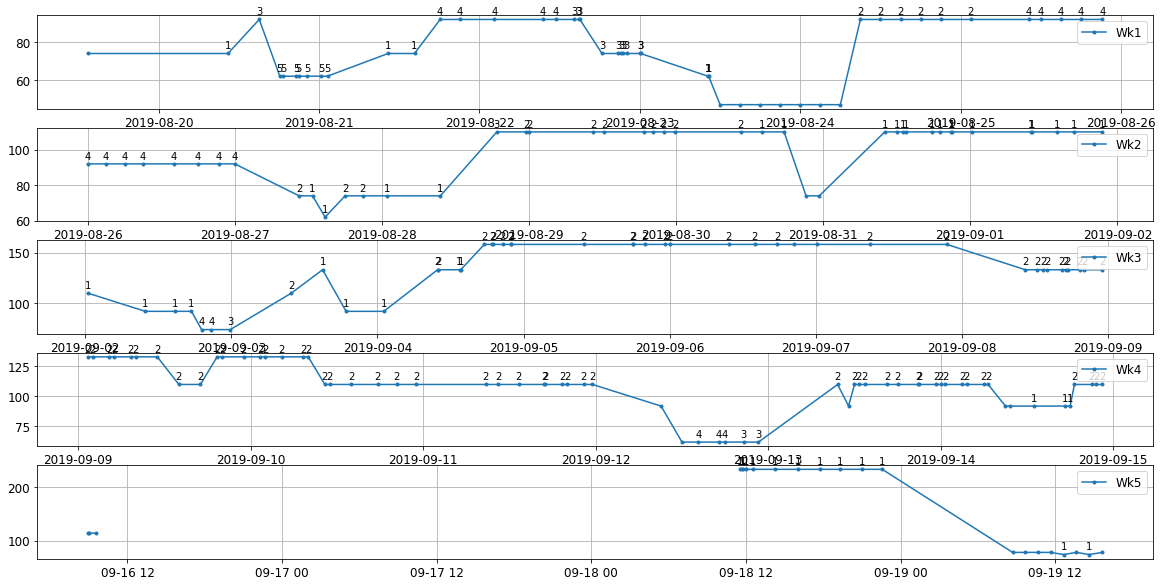

In [40]:
fig = plt.figure(figsize=(20,10))
q=0
for label, subdf in df_ryan.groupby('WeekNumber'):
    q=q+1
    plt.subplot(5,1,q)
    plt.plot(subdf['AbsTime'],subdf['Price'],marker='.',label=label)
    plt.grid()
    plt.legend()
    
    for k in range(len(subdf)):
        if not(np.isnan(subdf.iloc[k]['Remaining'])):
            plt.annotate('{:.1g}'.format(subdf.iloc[k]['Remaining']),
                                xy=(subdf.iloc[k]['AbsTime'], subdf.iloc[k]['Price']),
                                xytext=(0, 3),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center',va='bottom')

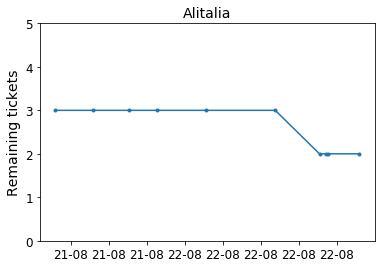

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df_ali.AbsTime, df_ali.Remaining,marker='.')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.title('Alitalia');
plt.yticks(range(0,6));
plt.ylabel('Remaining tickets');

## Integration (numerical)

In [42]:
import scipy as sp
#from scipy.integrate import trapz

In [43]:
#def nansplit(vec, isnan):
def nansplit(*args):
    # syntax: vector, flags isnan(true/false)
    vec = args[0]
    if len(args)>1:
        isnan = args[1]
    else:
        isnan = np.isnan(args[0])
        
    suby = []
    ssy = []
    for k in range(0,len(isnan)):
        if ~isnan[k]:
            ssy.append(vec[k])
        else:
            if ssy != []:
                suby.append(ssy)
                ssy= [] # restart
    suby.append(ssy)
    return suby


In [44]:
import datetime

def nan_integral_average(y,x):
    suby = nansplit(y, np.isnan(y))
    subx = nansplit(x, np.isnan(y))
    integrate = []
    dist = []
    for k in range(0,len(suby)):
        if len(subx[k]) <2: # eliminate sections with one point only as average integral is undefined
            continue
        integrate.append( sp.integrate.trapz( suby[k], subx[k]) )
        dist.append( subx[k][-1]-subx[k][0] )
        
    return sum(integrate, datetime.timedelta())/sum(dist,datetime.timedelta())

In [45]:
def time_average(df):
    # integral average
    try:
        #total_integral = sp.integrate.trapz(df['Price'], df['AbsTime'])
        #time_delta = df.iloc[len(df)-1]['AbsTime'] - df.iloc[0]['AbsTime']
        #return total_integral/time_delta
        return nan_integral_average(list(df['Price']),list(df['AbsTime']))
    except IndexError:
        return np.nan

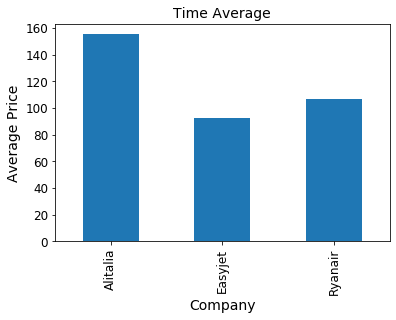

In [46]:
# time average
df.groupby('Company').apply(time_average).plot(kind='bar');
plt.ylabel('Average Price')
plt.title('Time Average');

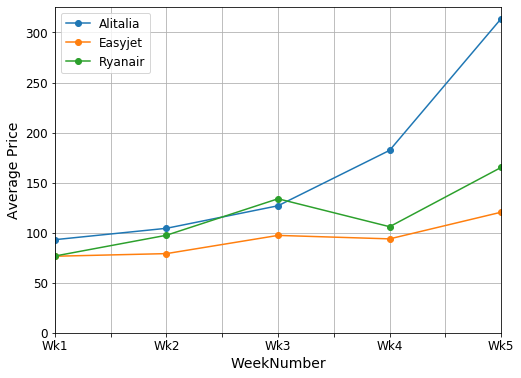

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
for label, subdf in df.groupby('Company'):
    subdf.groupby('WeekNumber').apply(time_average).plot(marker='o',ax=ax, label = label)
plt.grid('on');
ax.legend();
yorigshow()
plt.ylabel('Average Price');

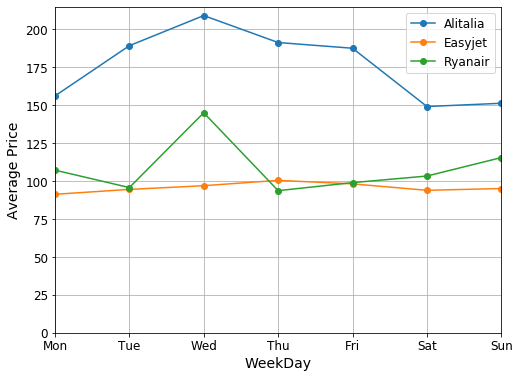

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
for label, subdf in df.groupby('Company'):
    subdf.groupby('WeekDay')['Price'].mean().plot(marker='o',ax=ax, label = label)
yorigshow()
plt.grid();
ax.legend();
plt.ylabel('Average Price');

## Price deviation from weekly average

In [49]:
def deviation_proc(df):
    weekly_averages = df.groupby('WeekNumber').apply(time_average)
    dev=[]
    ave=[]
    for k in range(0,len(df)):
        dev.append( df.iloc[k]['Price'] - weekly_averages[df.iloc[k]['WeekNumber']])
        ave.append(weekly_averages[df.iloc[k]['WeekNumber']])
    df['Deviation']= dev
    df['WeeklyAveragePrice']=ave

In [50]:
deviation_proc(df_easy)

C:\Users\Roberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Roberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [154]:
def weekly_average_plot(df):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    ax.plot(df.AbsTime,df.Price,label='Price',linewidth=2);
    ax.plot(df.AbsTime, df.WeeklyAveragePrice,label='Weekly Average Price',linewidth=2);
    plt.legend();
    ax.set_xticks(week_range);
    ax.set_xticklabels(week_labels+['Flight Day'])
    ax.set_xticks(everyday, minor=True)
    plt.xlim(week_range[0],endday)
    #ax.minorticks_on()
    ax.grid(b=True, which = 'minor',alpha=.5)
    ax.grid(b=True, which = 'major',alpha=.8,color='b')
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    #yorigshow()
    plt.ylabel('Price (£)')

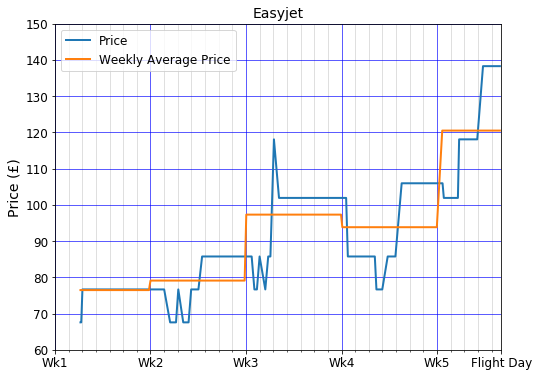

In [155]:
weekly_average_plot(df_easy)
plt.ylim(60,150);
plt.title('Easyjet');


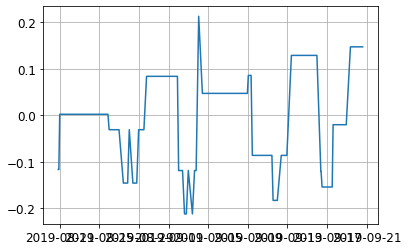

In [53]:
plt.plot(df_easy['AbsTime'], df_easy['Deviation']/df_easy['WeeklyAveragePrice']);
plt.grid()

In [54]:
def deviation_plot(df):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(df.AbsTime,df.Deviation);
    plt.xticks(week_range);
    plt.xlim(week_range[0],today)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.grid();


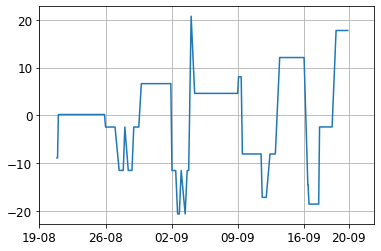

In [55]:
deviation_plot(df_easy)

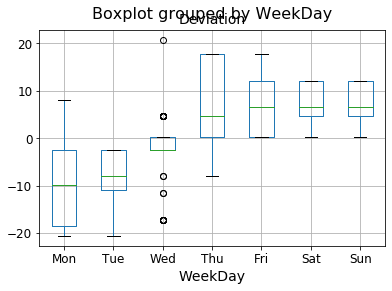

In [56]:
df_easy.boxplot(column='Deviation', by='WeekDay')

In [57]:
def weekly_deviation_plot(df):
    p90=df.groupby('WeekDay')['Deviation'].apply(lambda x: np.percentile(x,90))
    p50=df.groupby('WeekDay')['Deviation'].apply(lambda x: np.percentile(x,50))
    p10=df.groupby('WeekDay')['Deviation'].apply(lambda x: np.percentile(x,10))
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    #p10.plot(ax=ax,label='10-percentile',marker='.')
    p50.plot(ax=ax,label='median',marker='o',linewidth=3)
    #p90.plot(ax=ax,label='90-percentile',marker='.')
    plt.legend()
    plt.ylabel('(£)');
    #plt.ylim(-12,12)
    plt.title('Deviation from weekly average price');
    plt.grid();

(-0.2, 6.2)

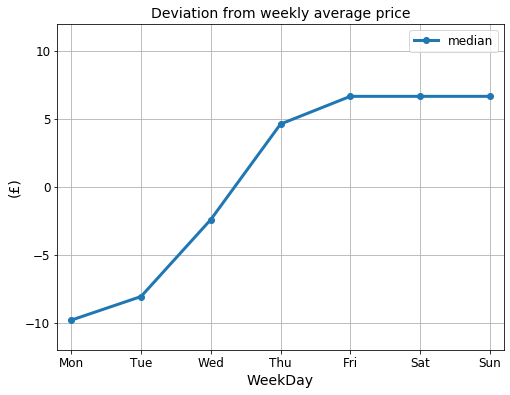

In [157]:
weekly_deviation_plot(df_easy)
plt.ylim(-12,12);
plt.xlim(-.2,6.2);

In [59]:
deviation_proc(df_ryan)

C:\Users\Roberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Roberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


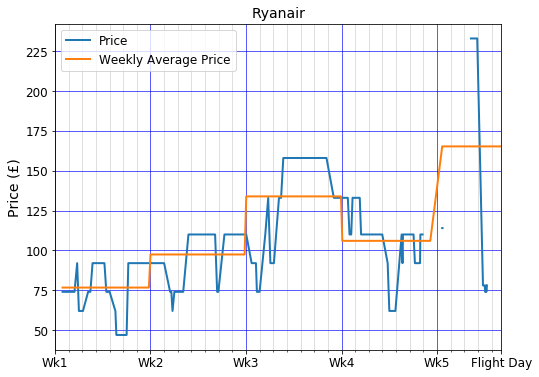

In [158]:
weekly_average_plot(df_ryan)
plt.title('Ryanair');

C:\Users\Roberto\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


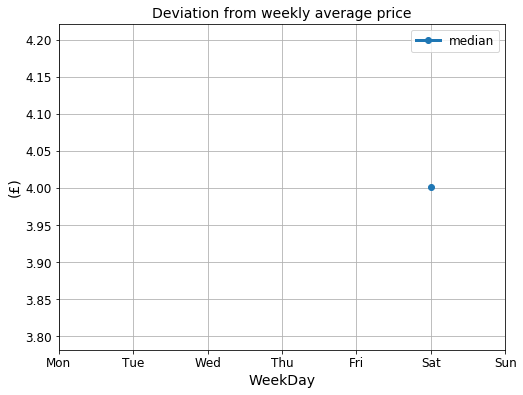

In [61]:
weekly_deviation_plot(df_ryan)

In [62]:
weekly_averages = df_ryan.groupby('WeekNumber').apply(time_average)
weekly_averages

WeekNumber
Wk1     76.672904
Wk2     97.440085
Wk3    133.885951
Wk4    105.988419
Wk5    165.260139
dtype: float64

In [63]:
df_ryan_wk1 = df_ryan[df_ryan['WeekNumber']=='Wk1']
#df_ryan_wk1.head()

In [64]:
sdf = df_ryan_wk1.groupby('TimeBand')['Deviation'].mean()
sdf

TimeBand
0-3      -4.835761
3-6     -29.752904
6-9     -29.752904
9-12      1.317096
12-15     3.735667
15-18     6.303096
18-21    -4.789904
21-24    -0.816654
Name: Deviation, dtype: float64

In [65]:
table = pd.pivot_table(df_ryan, values='Deviation', index=['WeekNumber','WeekDay'], columns='TimeBand',\
                           aggfunc=np.mean)
table

TimeBand                  0-3        3-6        6-9       9-12      12-15  \
WeekNumber WeekDay                                                          
Wk1        Mon            NaN        NaN        NaN        NaN  -2.682904   
           Tue            NaN        NaN        NaN  -2.682904        NaN   
           Wed     -14.682904        NaN        NaN  -2.682904  -2.682904   
           Thu      15.317096        NaN        NaN  15.317096  15.317096   
           Fri      -2.682904        NaN        NaN -14.682904 -29.752904   
           Sat     -29.752904 -29.752904 -29.752904  15.317096  15.317096   
           Sun      15.317096        NaN        NaN  15.317096  15.317096   
Wk2        Mon      -5.450085  -5.450085  -5.450085  -5.450085  -5.450085   
           Tue      -5.450085        NaN        NaN -23.450085 -29.450085   
           Wed     -23.450085        NaN        NaN -23.450085        NaN   
           Thu      12.549915        NaN        NaN  12.549915  12.549915   
           Fri            NaN        NaN        NaN  12.549915  12.549915   
           Sat            NaN        NaN        NaN  12.549915  12.549915   
           Sun      12.549915        NaN        NaN  12.549915  12.549915   
Wk3        Mon     -23.895951        NaN        NaN -41.895951 -41.895951   
           Tue            NaN        NaN        NaN -23.895951  -0.895951   
           Wed     -41.895951        NaN        NaN  -0.895951  -0.895951   
           Thu            NaN        NaN        NaN  24.104049        NaN   
           Fri      24.104049        NaN        NaN  24.104049  24.104049   
           Sat      24.104049        NaN  24.104049        NaN        NaN   
           Sun            NaN        NaN        NaN  -0.895951  -0.895951   
Wk4        Mon      27.001581  27.001581  27.001581  27.001581   4.001581   
           Tue      27.001581  27.001581  27.001581   4.001581   4.001581   
           Wed            NaN        NaN   4.001581   4.001581   4.001581   
           Thu            NaN        NaN        NaN -13.998419 -43.998419   
           Fri            NaN        NaN        NaN  -4.998419   4.001581   
           Sat       4.001581   4.001581   4.001581 -13.998419 -13.998419   
Wk5        Mon            NaN        NaN -51.270139 -51.270139        NaN   
           Wed            NaN        NaN        NaN  67.729861  67.729861   
           Thu            NaN        NaN -87.270139 -87.270139 -89.936805   

TimeBand                15-18      18-21      21-24  
WeekNumber WeekDay                                   
Wk1        Mon            NaN        NaN        NaN  
           Tue      15.317096 -14.682904 -14.682904  
           Wed            NaN  15.317096  15.317096  
           Thu      15.317096  -2.682904  -2.682904  
           Fri     -29.752904 -29.752904 -29.752904  
           Sat      15.317096  15.317096  15.317096  
           Sun      15.317096  15.317096  15.317096  
Wk2        Mon            NaN  -5.450085  -5.450085  
           Tue            NaN -23.450085        NaN  
           Wed            NaN  12.549915  12.549915  
           Thu            NaN  12.549915  12.549915  
           Fri      12.549915        NaN -23.450085  
           Sat      12.549915  12.549915  12.549915  
           Sun      12.549915        NaN  12.549915  
Wk3        Mon     -41.895951 -59.895951 -59.895951  
           Tue            NaN -41.895951        NaN  
           Wed      24.104049  24.104049  24.104049  
           Thu      24.104049  24.104049  24.104049  
           Fri      24.104049  24.104049        NaN  
           Sat            NaN        NaN  24.104049  
           Sun      -0.895951  -0.895951  -0.895951  
Wk4        Mon       4.001581  27.001581  27.001581  
           Tue       4.001581   4.001581   4.001581  
           Wed       4.001581   4.001581   4.001581  
           Thu     -43.998419 -43.998419 -43.998419  
           Fri       4.001581   4.001581   4.001581  
           Sat     -13.

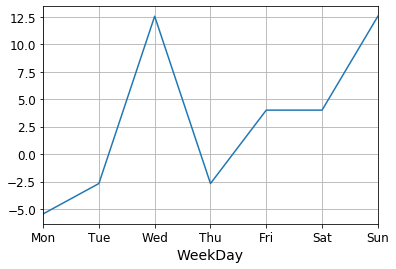

In [66]:
df_ryan.groupby('WeekDay')['Deviation'].median().plot();
plt.grid()

In [67]:
df_ryan.groupby(['WeekDay','TimeBand'])['Deviation'].mean()

WeekDay  TimeBand
Mon      0-3          6.164282
         3-6         16.184359
         6-9         -0.679265
         9-12       -24.576946
         12-15      -11.506840
         15-18      -18.947185
         18-21      -14.247765
         21-24      -12.781485
Tue      0-3         16.184359
         3-6         27.001581
         6-9         27.001581
         9-12        -8.405155
         12-15      -13.948635
         15-18        9.659339
         18-21      -17.940769
         21-24       -5.340661
Wed      0-3        -23.677961
         3-6               NaN
         6-9          4.001581
         9-12        22.408284
         12-15       28.959480
         15-18       33.513387
         18-21       21.989023
         21-24       27.442249
Thu      0-3         13.933506
         3-6               NaN
         6-9        -87.270139
         9-12       -26.065085
         12-15      -39.327893
         15-18      -22.961853
         18-21       -2.506840
         21-24       

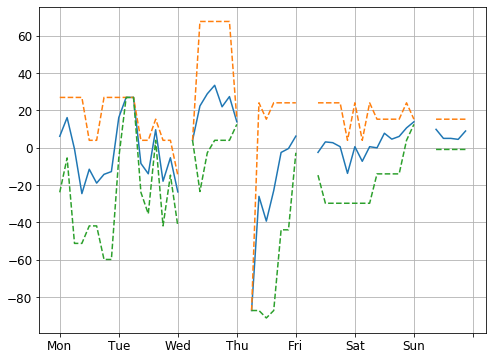

In [68]:
plt.figure(figsize=(8,6))

res_mean = df_ryan.groupby(['WeekDay','TimeBand'])['Deviation'].mean().values
res_max = df_ryan.groupby(['WeekDay','TimeBand'])['Deviation'].max().values
res_min = df_ryan.groupby(['WeekDay','TimeBand'])['Deviation'].min().values
plt.plot(res_mean);
plt.plot(res_max,'--');
plt.plot(res_min,'--');
plt.xticks(range(0,57,8),day_labels);
plt.grid()

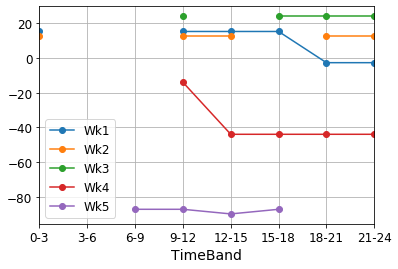

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
wlabs = ['Wk1','Wk2','Wk3','Wk4','Wk5']
for k in range(0,6):
    try:
        table.loc[wlabs[k],'Thu'].plot(ax=ax,label=wlabs[k],marker='o')
    except:
        print()
plt.legend();
plt.grid();

## Unique prices

In [152]:
def unique_prices_calc( prices ):
    unique_prices=np.sort(pd.unique( prices ))
    print('Unique prices: ', unique_prices)
    abs_delta=np.diff(unique_prices)
    print('Abs delta: ',abs_delta)
    rel_delta = unique_prices[1:]/unique_prices[0:len(unique_prices)-1]
    print('Rel delta: ',rel_delta)
    # graphics
    plt.figure(figsize=(8,6))
    plt.plot(unique_prices,marker='o')
    plt.grid();
    plt.xticks(range(0, sum(~np.isnan(unique_prices))), '')
    for k in range(len(abs_delta)):
        plt.annotate('+{:.3g}'.format(abs_delta[k]),
                    xy=(k+.9, unique_prices[k+1]),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='right',va='bottom')
    #yorigshow()
    plt.ylabel('Price (£)')

Unique prices:  [ 46.92  61.99  73.99  77.99  91.99 109.99 113.99 132.99 157.99 232.99
    nan]
Abs delta:  [15.07 12.    4.   14.   18.    4.   19.   25.   75.     nan]
Rel delta:  [1.321185   1.19357961 1.05406136 1.17951019 1.19567344 1.03636694
 1.16668129 1.18798406 1.47471359        nan]


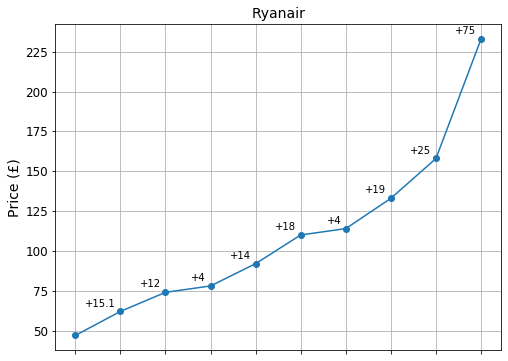

In [153]:
unique_prices_calc(df_ryan['Price'])
plt.title('Ryanair');

In [72]:
df_nosale=df[~df['IsSale']]
nosale_ryan_prices = df_nosale.loc[df['Company']=='Ryanair','Price']
#nosale_ryan_prices

Unique prices:  [ 61.99  73.99  91.99 109.99 132.99 157.99 232.99    nan]
Abs delta:  [12. 18. 18. 23. 25. 75. nan]
Rel delta:  [1.19357961 1.24327612 1.19567344 1.20910992 1.18798406 1.47471359
        nan]


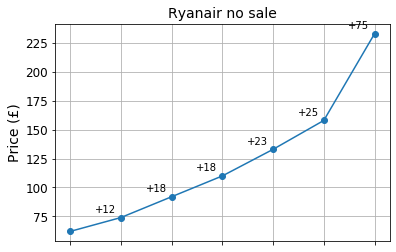

In [73]:
unique_prices_calc(nosale_ryan_prices)
plt.title('Ryanair no sale');

In [74]:
df_ryan[df_ryan['IsSale']][['AbsTime','Price']]

,AbsTime,Price
75,2019-08-23 12:00:39,46.92
78,2019-08-23 15:00:32,46.92
81,2019-08-23 18:00:32,46.92
84,2019-08-23 21:00:33,46.92
87,2019-08-24 00:00:37,46.92
90,2019-08-24 03:00:34,46.92
93,2019-08-24 06:00:34,46.92
490,2019-09-12 09:05:49,91.99
493,2019-09-12 12:00:26,61.99
514,2019-09-13 11:10:47,91.99


Unique prices:  [ 67.57  76.66  85.75 101.91 105.95 118.07 138.27]
Abs delta:  [ 9.09  9.09 16.16  4.04 12.12 20.2 ]
Rel delta:  [1.13452716 1.11857553 1.18845481 1.03964282 1.11439358 1.17108495]


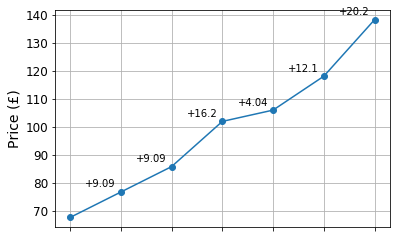

In [75]:
unique_prices_calc(df_easy['Price'])


Unique prices:  [ 67.57  76.66  85.75 101.91 118.07 138.27]
Abs delta:  [ 9.09  9.09 16.16 16.16 20.2 ]
Rel delta:  [1.13452716 1.11857553 1.18845481 1.15857129 1.17108495]


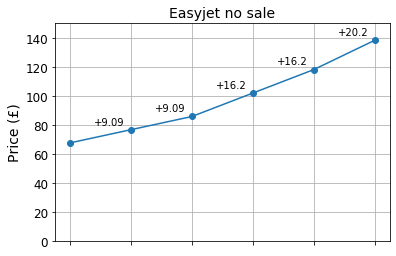

In [76]:
uneasy=np.unique(df_easy['Price'])
uneasy=uneasy[[0,1,2,3,5,6]]
unique_prices_calc(uneasy)
plt.title('Easyjet no sale');
yorigshow()
plt.ylim(0,150);

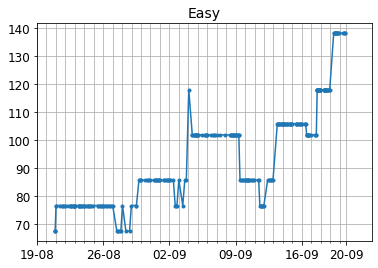

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df_easy.AbsTime, df_easy.Price,marker='.')
ax.set_xticks(week_range);
ax.set_xticks(everyday, minor=True)
plt.xlim(week_range[0],today)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.grid(which='both')
plt.title('Easy');

In [78]:
unique_prices=np.sort(pd.unique(df_ali['Price']))
print(unique_prices)

[ 78.68181818  78.73636364 104.13636364 104.3        104.34545455
 104.37272727 104.41818182 104.43636364 104.44545455 127.95454545
 128.02727273 128.12727273 128.17272727 128.36363636 152.90909091
 152.96363636 152.99090909 176.62727273 176.68181818 201.22727273
 201.28181818 225.77272727 238.5        264.3        281.50909091
 281.57272727 353.32727273 353.34545455 353.37272727]


In [79]:
def price_group(prices, thr=0.5):
    # group prices in sublists of adjacent prices when they are below a threshold
    ov =[]
    sub=[]
    #thr = 0.5 # threshold
    for price in prices:
        if sub==[]:
            sub.append(price)
            #ov.append(sub)
        else:
            
            if (price-sub[-1]) < thr:
                sub.append(price)
            else:
                ov.append(sub) # attach previous sub
                sub=[price] # start new sub
    ov.append(sub) # attach last sub
    return ov

In [80]:
def price_group_ave(groups):
    # reports average for every group
    ave_prices = []
    for sb in groups:
        ave_prices.append(np.mean(sb))
    return ave_prices

In [81]:
# groups of adjacent prices
ali_groups = price_group(unique_prices)
# averages
ali_ave_prices = price_group_ave(ali_groups)

Unique prices:  [ 78.70909091 104.35064935 128.12909091 152.95454545 176.65454545
 201.25454545 225.77272727 238.5        264.3        281.54090909]
Abs delta:  [25.64155844 23.77844156 24.82545455 23.7        24.6        24.51818182
 12.72727273 25.8        17.24090909]
Rel delta:  [1.32577633 1.22787057 1.19375346 1.15494799 1.13925484 1.12182672
 1.05637206 1.1081761  1.06523235]


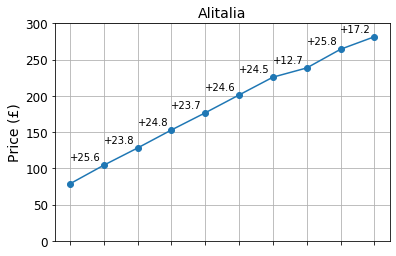

In [82]:
unique_prices_calc(ali_ave_prices[0:-1])
plt.title('Alitalia');
plt.ylim(0,300);

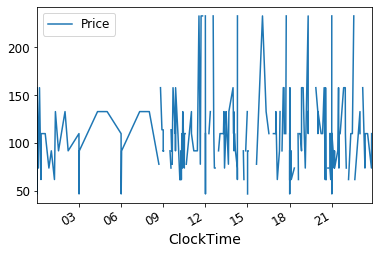

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_ryan.plot(x='ClockTime',y='Price',ax = ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))


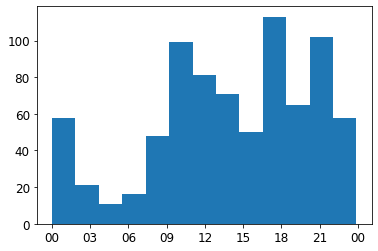

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['ClockTime'],bins=13)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

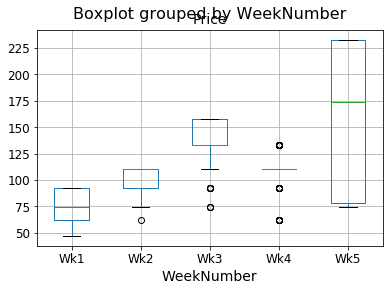

In [85]:
# boxplot
df_ryan.boxplot(by='WeekNumber',column='Price');

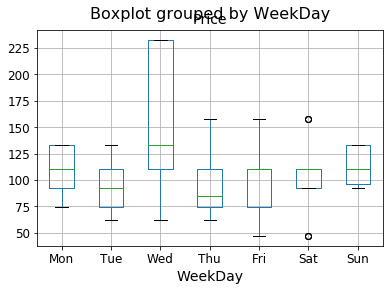

In [86]:
df_ryan.boxplot(by='WeekDay',column='Price');

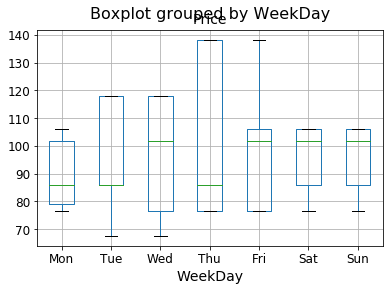

In [87]:
df_easy.boxplot(by='WeekDay',column='Price');

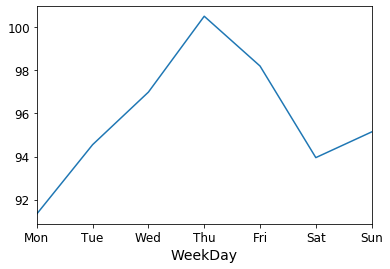

In [88]:
df_easy.groupby('WeekDay')['Price'].mean().plot();

In [89]:
df_easy.groupby('WeekNumber')['Price'].mean()

WeekNumber
Wk1     75.978250
Wk2     80.253721
Wk3     97.870000
Wk4     95.481486
Wk5    119.282000
Name: Price, dtype: float64

C:\Users\Roberto\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Roberto\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


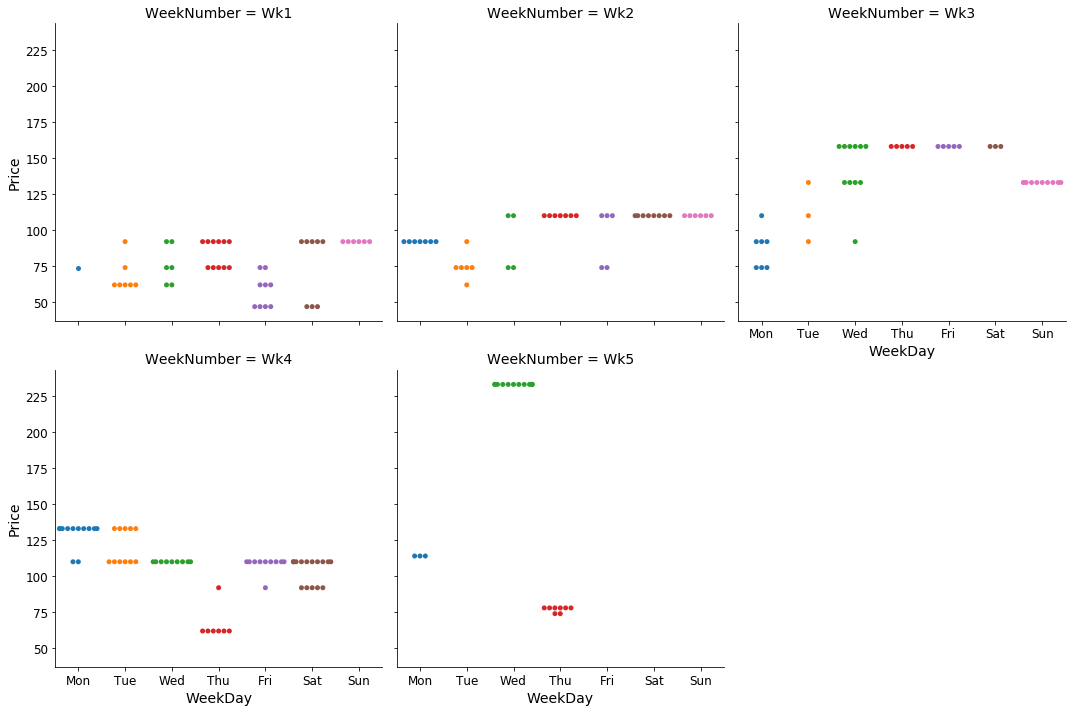

In [90]:
sns.catplot(x='WeekDay',y='Price',col='WeekNumber',data = df_ryan,kind='swarm',col_wrap=3);

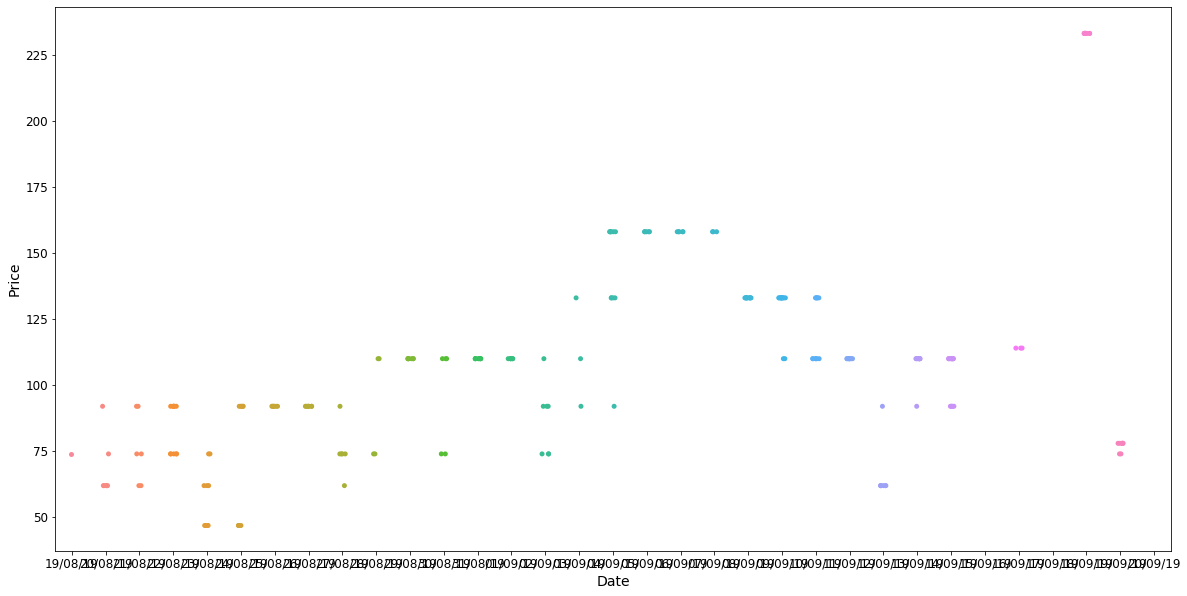

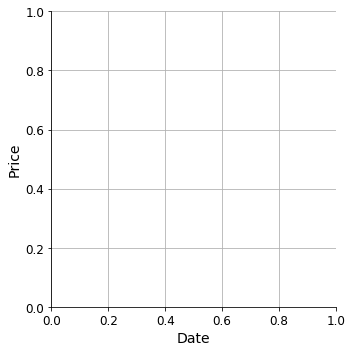

In [91]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.catplot(x='Date',y='Price',data = df_ryan,ax=ax);
plt.grid();
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

In [92]:
def nan_unique(inp):
    #unique with no nans
    tmp = np.unique(inp)
    res = tmp[~np.isnan(tmp)]
    return res

In [122]:
df_ryan.groupby('DateNum')['Price'].apply(lambda x: len(nan_unique(x)))

DateNum
2019-08-19    1
2019-08-20    3
2019-08-21    3
2019-08-22    2
2019-08-23    3
2019-08-24    2
2019-08-25    1
2019-08-26    1
2019-08-27    3
2019-08-28    2
2019-08-29    1
2019-08-30    2
2019-08-31    1
2019-09-01    1
2019-09-02    3
2019-09-03    3
2019-09-04    3
2019-09-05    1
2019-09-06    1
2019-09-07    1
2019-09-08    1
2019-09-09    2
2019-09-10    2
2019-09-11    1
2019-09-12    2
2019-09-13    2
2019-09-14    2
2019-09-15    0
2019-09-16    1
2019-09-17    0
2019-09-18    1
2019-09-19    2
2019-09-20    0
Name: Price, dtype: int64

In [135]:
def week_time_ticks(ax, week_range, week_labels, everyday, endday):
    ax.set_xticks(week_range);
    ax.set_xticklabels(week_labels+['Flight'])
    ax.set_xticks(everyday, minor=True)
    #ax.set_xlim((week_range[0],week)
    #ax.minorticks_on()
    ax.grid(b=True, which = 'minor',alpha=.5)
    ax.grid(b=True, which = 'major',alpha=.8,color='b')

In [134]:
endday

DatetimeIndex(['2019-09-20 17:00:00'], dtype='datetime64[ns]', freq='W-FRI')

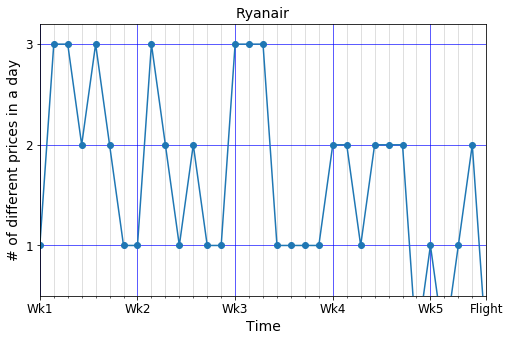

In [143]:
fig = plt.figure(figsize=(8,5))
df_ryan.groupby('DateNum')['Price'].apply(lambda x: len(nan_unique(x))).plot(marker='o');
plt.ylim(.5,3.2)
plt.yticks([1,2,3]);
plt.ylabel('# of different prices in a day')
plt.xlabel('Time')
#plt.grid('on');
plt.title('Ryanair')
week_time_ticks(fig.gca(), week_range, week_labels, everyday, endday)

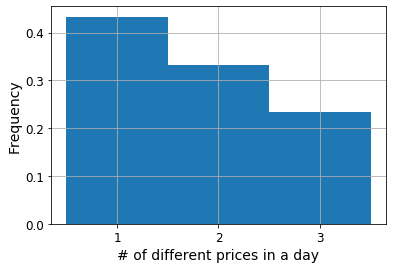

In [94]:
df_ryan.groupby('DateNum')['Price'].\
    apply(lambda x: len(nan_unique(x))).hist(histtype='stepfilled',\
                                              bins=[.5,1.5,2.5,3.5],\
                                               density=True);
plt.xticks([1,2,3]);
plt.xlabel('# of different prices in a day');
plt.ylabel('Frequency');

## Price changes

In [95]:
price_delta = np.array(np.diff(df_ryan['Price']))
# add a zero at the start
price_delta=np.concatenate((np.array([0]), price_delta))
price_delta[np.isnan(price_delta)] = 0 #set nans to no change
#price_delta

In [96]:
changes_ryan = df_ryan.loc[ price_delta !=0]
#changes_ryan.head()

In [97]:
changes_ryan.head()

,Date,Time,Company,DepartureTime,ArrivalTime,Price,Currency,Comments,AbsTime,ClockTime,DateNum,WeekNumber,TimeBand,WeekDay,IsSale,IsSoldOut,Remaining,Deviation,WeeklyAveragePrice
3,20/08/19,15:02:46,Ryanair,19:25,22:55,91.99,£,3 posti rimasti a questo prezzo,2019-08-20 15:02:46,1900-01-01 15:02:46,2019-08-20,Wk1,15-18,Tue,False,False,3.0,15.317096,76.672904
5,20/08/19,18:07:07,Ryanair,19:25,22:55,61.99,£,5 posti rimasti a questo prezzo,2019-08-20 18:07:07,1900-01-01 18:07:07,2019-08-20,Wk1,18-21,Tue,False,False,5.0,-14.682904,76.672904
24,21/08/19,10:19:36,Ryanair,19:25,22:55,73.99,£,1 posti rimasti a questo prezzo,2019-08-21 10:19:36,1900-01-01 10:19:36,2019-08-21,Wk1,9-12,Wed,False,False,1.0,-2.682904,76.672904
30,21/08/19,18:07:04,Ryanair,19:25,22:55,91.99,£,4 posti rimasti a questo prezzo,2019-08-21 18:07:04,1900-01-01 18:07:04,2019-08-21,Wk1,18-21,Wed,False,False,4.0,15.317096,76.672904
52,22/08/19,18:20:17,Ryanair,19:25,22:55,73.99,£,3 posti rimasti a questo prezzo,2019-08-22 18:20:17,1900-01-01 18:20:17,2019-08-22,Wk1,18-21,Thu,False,False,3.0,-2.682904,76.672904


In [98]:
changes_ryan_time_delta = np.diff(changes_ryan.AbsTime)
time_hour_delta = changes_ryan_time_delta/pd.Timedelta(hours=1)


In [99]:
np.log10(np.sort(time_hour_delta))

array([-8.42778031e-02, -3.62062949e-04, -3.62062949e-04,  0.00000000e+00,
        1.81287666e-01,  2.61130643e-01,  4.63934443e-01,  4.87491892e-01,
        5.13550520e-01,  5.86806022e-01,  5.96780304e-01,  6.27792430e-01,
        7.09599704e-01,  7.25321651e-01,  8.85455458e-01,  8.91599398e-01,
        9.65763354e-01,  9.82321496e-01,  1.10877167e+00,  1.16869386e+00,
        1.17608322e+00,  1.17666993e+00,  1.19998360e+00,  1.20973092e+00,
        1.32216759e+00,  1.32219632e+00,  1.33554705e+00,  1.38417912e+00,
        1.39350696e+00,  1.44122804e+00,  1.66997253e+00,  1.67965750e+00,
        1.70284682e+00,  1.86625615e+00,  1.94861806e+00,  2.04175225e+00])

In [100]:
10**np.arange(-0.05, 2.1, 0.05)

array([  0.89125094,   1.        ,   1.12201845,   1.25892541,
         1.41253754,   1.58489319,   1.77827941,   1.99526231,
         2.23872114,   2.51188643,   2.81838293,   3.16227766,
         3.54813389,   3.98107171,   4.46683592,   5.01187234,
         5.62341325,   6.30957344,   7.07945784,   7.94328235,
         8.91250938,  10.        ,  11.22018454,  12.58925412,
        14.12537545,  15.84893192,  17.7827941 ,  19.95262315,
        22.38721139,  25.11886432,  28.18382931,  31.6227766 ,
        35.48133892,  39.81071706,  44.66835922,  50.11872336,
        56.23413252,  63.09573445,  70.79457844,  79.43282347,
        89.12509381, 100.        , 112.20184543])

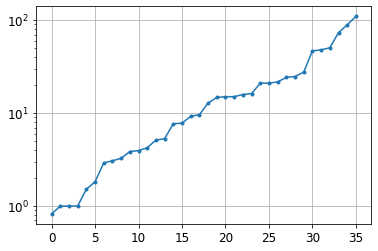

In [101]:
plt.plot(np.sort(time_hour_delta),marker='.');
plt.yscale('log');
plt.grid()

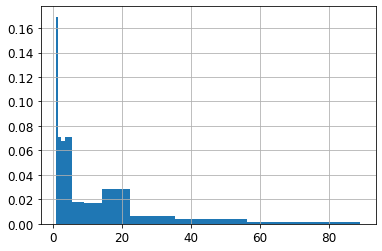

In [102]:
plt.hist(time_hour_delta,bins=10**np.arange(-0.05, 2.1, 0.2),density=True )
#plt.ylim(0,18);
plt.grid();

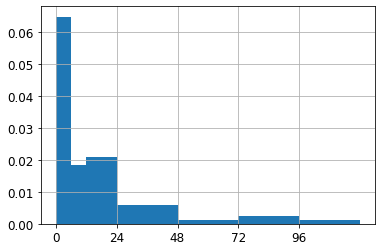

In [103]:
plt.hist(time_hour_delta,bins=[0,6,12,24,48,72,96,120],density=True )
#plt.ylim(0,18);
plt.xticks(np.arange(0,120,24))
plt.grid();

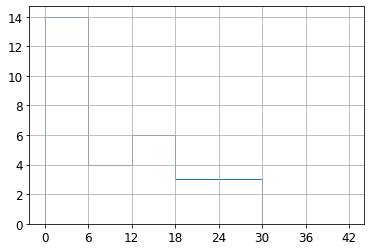

In [104]:
plt.hist(time_hour_delta, bins=np.arange(0,48,6),cumulative=False,histtype='step');
plt.xticks(np.arange(0,48,6));
plt.grid()

In [105]:
sum(time_hour_delta<6)/36

0.3888888888888889

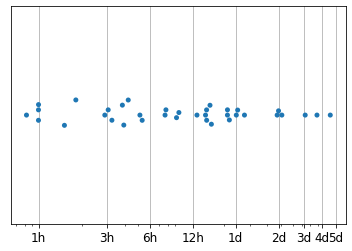

In [106]:
sns.swarmplot(x=time_hour_delta);
plt.grid();
plt.yticks([1],'')
plt.xscale('log')
plt.xticks([1,3,6,12,24,48,72,96,120],['1h','3h','6h','12h','1d','2d','3d','4d','5d']);

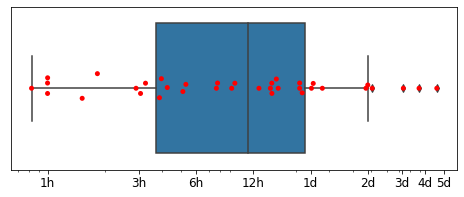

In [107]:
fig=plt.figure(figsize=(8,3))
ax=fig.add_subplot(111)

sns.swarmplot(x=time_hour_delta,ax=ax,color='r');
sns.boxplot(time_hour_delta, ax=ax)
#plt.grid();
plt.yticks([1],'')
plt.xscale('log')
plt.xticks([1,3,6,12,24,48,72,96,120],['1h','3h','6h','12h','1d','2d','3d','4d','5d']);

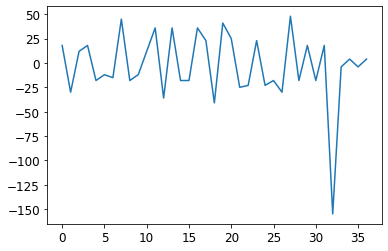

In [108]:
price_jumps = price_delta[ price_delta !=0]
plt.plot(price_jumps);

In [109]:
change_dir = np.sign(price_jumps)
change_dir

array([ 1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
        1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.])

In [110]:
ch1=change_dir[:-1]
ch2=change_dir[1:]

In [111]:
chdf=pd.DataFrame( np.transpose([ch1,ch2]),columns=['ch1','ch2'])
chdf.head()

,ch1,ch2
0,1.0,-1.0
1,-1.0,1.0
2,1.0,1.0
3,1.0,-1.0
4,-1.0,-1.0


In [112]:
chdf.groupby(['ch1','ch2'])['ch1'].count()

ch1   ch2 
-1.0  -1.0     8
       1.0    12
 1.0  -1.0    12
       1.0     4
Name: ch1, dtype: int64

In [113]:
chsum=pd.DataFrame(np.array([[40,60],[75,25]]),columns=['Followed by decrease','Followed by increase'],\
                  index=['Decrease','Increase'])
chsum

,Followed by decrease,Followed by increase
Decrease,40,60
Increase,75,25


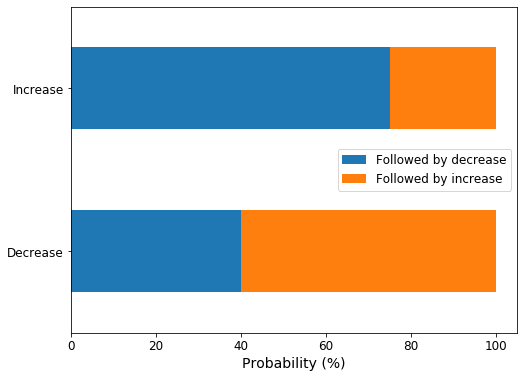

In [114]:
fig, ax = plt.subplots(figsize=(8,6))
chsum.plot.barh(stacked=True,ax=ax);
#ax.xaxis.grid(which='major')
#plt.ylim(-1,2);
plt.xlabel('Probability (%)');

In [115]:
total_changes_ryan = len(changes_ryan)
total_changes_ryan

37

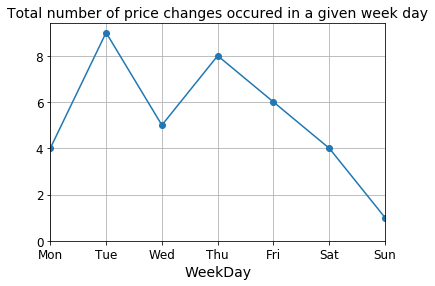

In [116]:
changes_ryan.groupby('WeekDay')['Date'].count().plot(marker='o');
yorigshow()
plt.title('Total number of price changes occured in a given week day');
plt.grid()

In [117]:
increase_ryan = df_ryan.loc[ price_delta >0]
decrease_ryan = df_ryan.loc[ price_delta <0]
print('Increases: ',len(increase_ryan))
print('Decreases: ',len(decrease_ryan))

Increases:  17
Decreases:  20


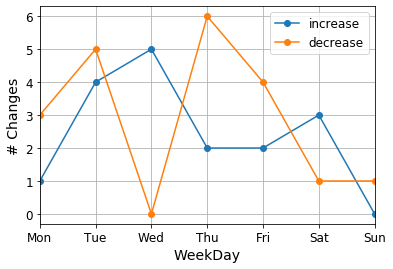

In [118]:
fig = plt.figure();
ax = fig.add_subplot()
increase_ryan.groupby('WeekDay')['Date'].count().plot(ax=ax,label='increase',marker='o');
decrease_ryan.groupby('WeekDay')['Date'].count().plot(ax=ax,label='decrease',marker='o');
ax.legend();
plt.grid()
plt.ylabel('# Changes');

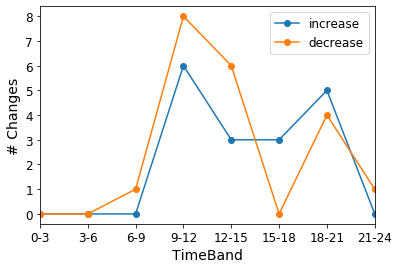

In [119]:
fig = plt.figure();
ax = fig.add_subplot()
increase_ryan.groupby('TimeBand')['Date'].count().plot(ax=ax,label='increase',marker='o');
decrease_ryan.groupby('TimeBand')['Date'].count().plot(ax=ax,label='decrease',marker='o');
ax.legend();
plt.ylabel('# Changes');

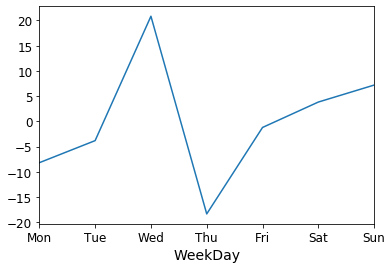

In [120]:
df_ryan.groupby('WeekDay')['Deviation'].mean().plot();

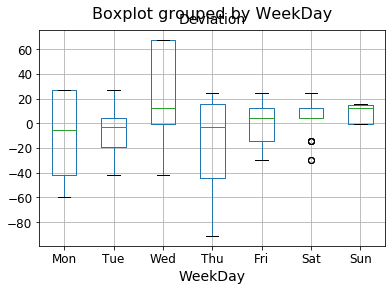

In [121]:
df_ryan.boxplot(by='WeekDay', column='Deviation')